<a href="https://colab.research.google.com/github/zahrababacar6c/Mining-Quality-Prediction/blob/main/MiningQuality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import des modules/le jeu de donnees et effectuer l'analyse exploratoire des donnees**

In [29]:
!pip install tensorflow

In [1]:
!pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import zipfile
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# définir le style du notebook sur le thème monokai

In [3]:
df_mining = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mining_data.csv")

In [4]:
df_mining.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.2,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.2,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.2,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.2,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11


In [5]:
df_mining.dtypes

,0
% Iron Feed,float64
% Silica Feed,float64
Starch Flow,float64
Amina Flow,float64
Ore Pulp Flow,float64
Ore Pulp pH,float64
Ore Pulp Density,float64
Flotation Column 01 Air Flow,float64
Flotation Column 02 Air Flow,float64
Flotation Column 03 Air Flow,float64


In [6]:
df_mining.isnull().sum()

,0
% Iron Feed,0
% Silica Feed,0
Starch Flow,0
Amina Flow,0
Ore Pulp Flow,0
Ore Pulp pH,0
Ore Pulp Density,0
Flotation Column 01 Air Flow,0
Flotation Column 02 Air Flow,0
Flotation Column 03 Air Flow,0


In [7]:
df_mining.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,...,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000
mean,56.294974,14.651438,2869.241181,488.144186,397.577332,9.767534,1.680348,280.166032,277.172893,281.097236,...,290.774336,520.242050,522.648563,531.355055,420.306805,425.237994,429.927646,421.006767,65.049435,2.327228
std,5.158958,6.808961,1187.990184,90.736360,9.468496,0.387036,0.069213,29.616570,29.936823,28.537193,...,28.158596,130.389539,127.450562,150.614529,90.566437,83.601851,85.320602,83.736727,1.118479,1.125623
min,42.740000,1.310000,0.074147,241.699632,376.272600,8.753370,1.519829,175.666333,175.923177,176.471917,...,186.074077,149.451600,211.266111,126.352031,162.293185,167.139620,161.485667,175.908240,62.050000,0.600000
25%,52.670000,8.940000,2073.322500,432.204667,395.212583,9.527158,1.647197,250.268667,250.367333,250.693667,...,263.524333,413.516320,442.291000,410.134583,356.440167,357.074583,358.078583,356.567833,64.370000,1.440000
50%,56.080000,13.850000,2994.311667,504.510667,399.354833,9.797963,1.697560,299.418000,297.433000,299.048333,...,299.350833,492.971167,496.380667,494.859500,410.511667,408.022833,419.931167,410.043333,65.210000,2.000000
75%,59.720000,19.600000,3712.951667,553.479083,402.458750,10.037833,1.728257,300.127333,300.435000,300.308667,...,301.239667,594.960083,595.989167,601.060000,486.533417,485.580833,490.725500,475.922283,65.860000,3.010000
max,65.780000,33.400000,6295.130657,739.422405,418.625439,10.808046,1.853229,372.387588,369.550000,359.948635,...,370.190800,862.197932,828.593000,886.820204,680.019967,675.571459,698.621871,659.618696,68.010000,5.530000


# **Visualisation des donnees**

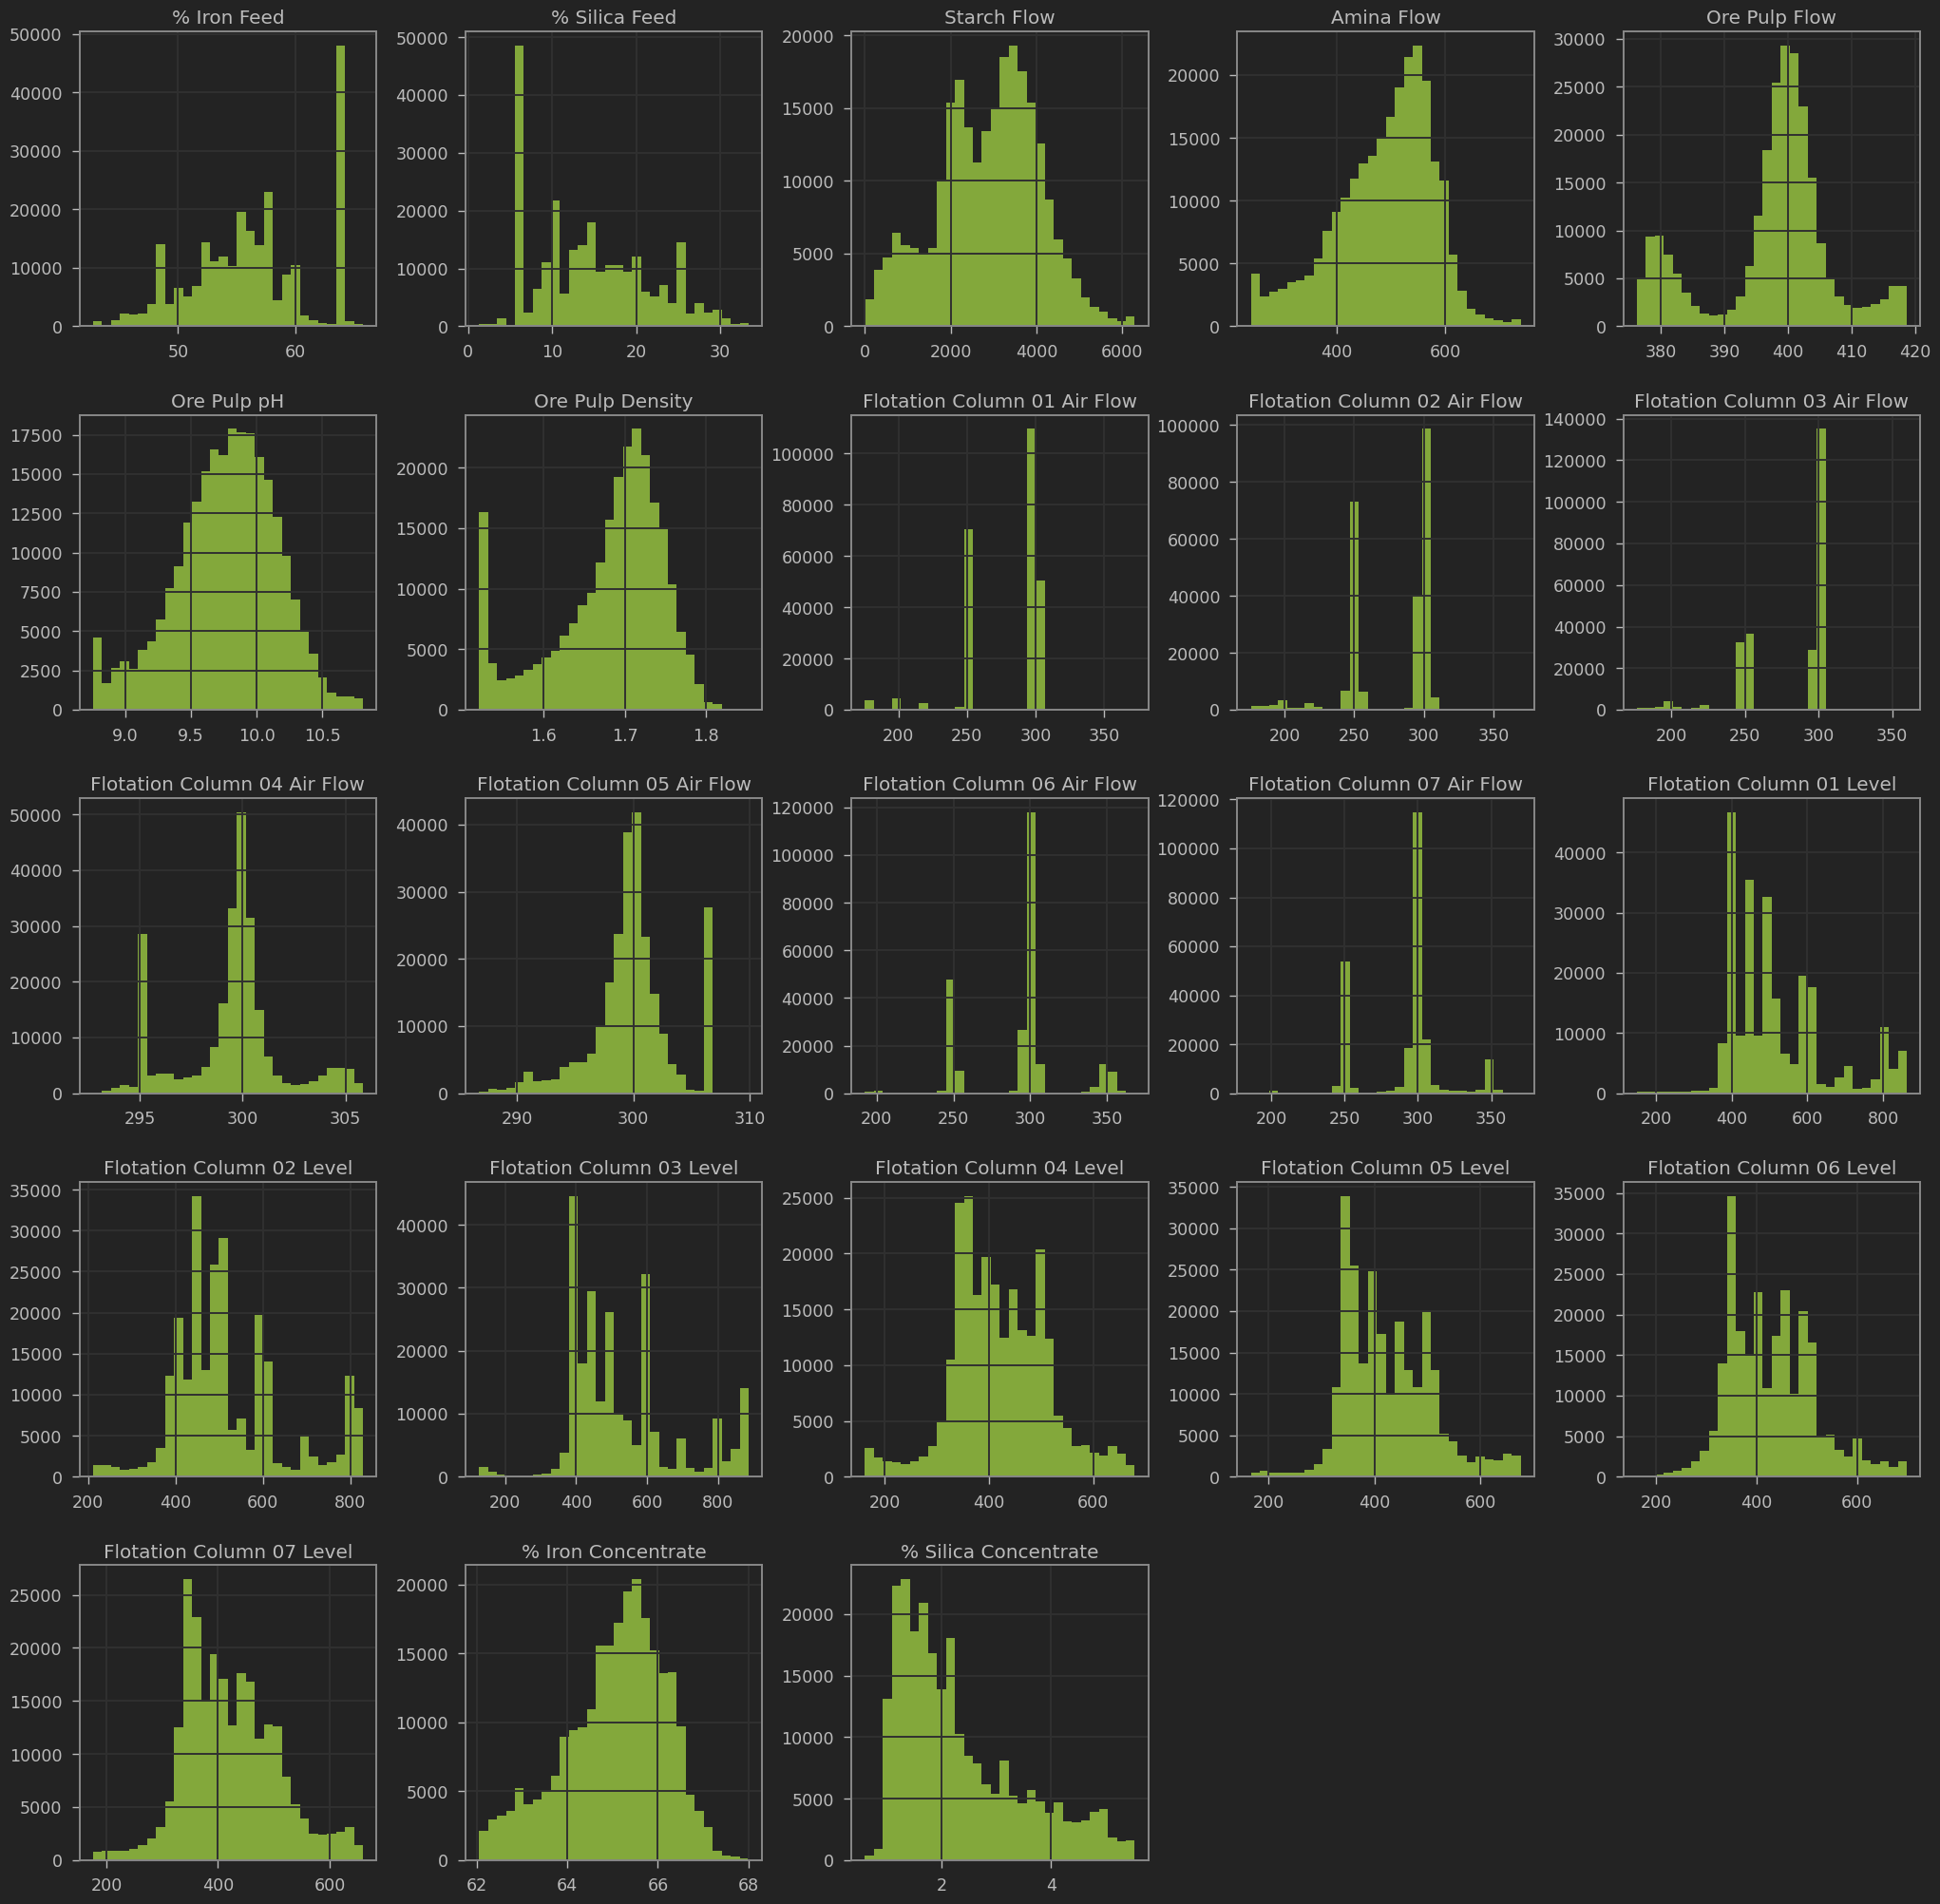

In [8]:
df_mining.hist(figsize=(25,25), bins = 30, color='g')
plt.show()

In [9]:
# Matrice de correlation
df_mining.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971837,0.028644,-0.088595,0.164676,0.007496,-0.125583,-0.062448,-0.170716,-0.062318,...,-0.016722,0.029619,0.020928,0.015189,0.016346,0.023571,0.003910,0.026100,0.055526,-0.077108
% Silica Feed,-0.971837,1.000000,-0.016489,0.079065,-0.154508,0.007953,0.104567,0.091833,0.183953,0.084325,...,0.046193,-0.038417,-0.037113,-0.022653,-0.034534,-0.044270,-0.020568,-0.047079,-0.044292,0.072778
Starch Flow,0.028644,-0.016489,1.000000,0.261934,0.044926,0.269135,0.231530,0.195538,0.192244,0.187602,...,0.202817,-0.302567,-0.286336,-0.309177,-0.013037,-0.057417,-0.077105,-0.039584,0.071303,-0.068008
Amina Flow,-0.088595,0.079065,0.261934,1.000000,0.219162,0.124254,0.659461,0.111994,0.124490,0.102632,...,0.081561,-0.270753,-0.236452,-0.288484,-0.183739,-0.215334,-0.209496,-0.171384,-0.111045,0.157644
Ore Pulp Flow,0.164676,-0.154508,0.044926,0.219162,1.000000,0.121256,0.012571,-0.141215,-0.122322,-0.144232,...,-0.146904,-0.008877,-0.008335,-0.055890,-0.010212,0.002158,-0.018051,0.017185,0.085098,0.008519
Ore Pulp pH,0.007496,0.007953,0.269135,0.124254,0.121256,1.000000,0.115073,0.163433,0.146264,0.193887,...,0.178322,-0.166525,-0.154391,-0.140251,0.046933,0.013095,-0.079157,0.019193,0.192705,-0.147550
Ore Pulp Density,-0.125583,0.104567,0.231530,0.659461,0.012571,0.115073,1.000000,-0.004695,0.026413,-0.031237,...,-0.052655,-0.112201,-0.093542,-0.149823,-0.089066,-0.142675,-0.105346,-0.087454,0.015116,0.047413
Flotation Column 01 Air Flow,-0.062448,0.091833,0.195538,0.111994,-0.141215,0.163433,-0.004695,1.000000,0.854298,0.955256,...,0.658199,-0.443870,-0.428294,-0.372533,-0.062665,-0.092254,-0.125196,-0.112074,0.099239,-0.219698
Flotation Column 02 Air Flow,-0.170716,0.183953,0.192244,0.124490,-0.122322,0.146264,0.026413,0.854298,1.000000,0.866927,...,0.592888,-0.437313,-0.428303,-0.368913,-0.075833,-0.112465,-0.124478,-0.114693,0.059709,-0.169029
Flotation Column 03 Air Flow,-0.062318,0.084325,0.187602,0.102632,-0.144232,0.193887,-0.031237,0.955256,0.866927,1.000000,...,0.661261,-0.443454,-0.423836,-0.365800,-0.047216,-0.064355,-0.105673,-0.086448,0.100888,-0.219593


<Axes: >

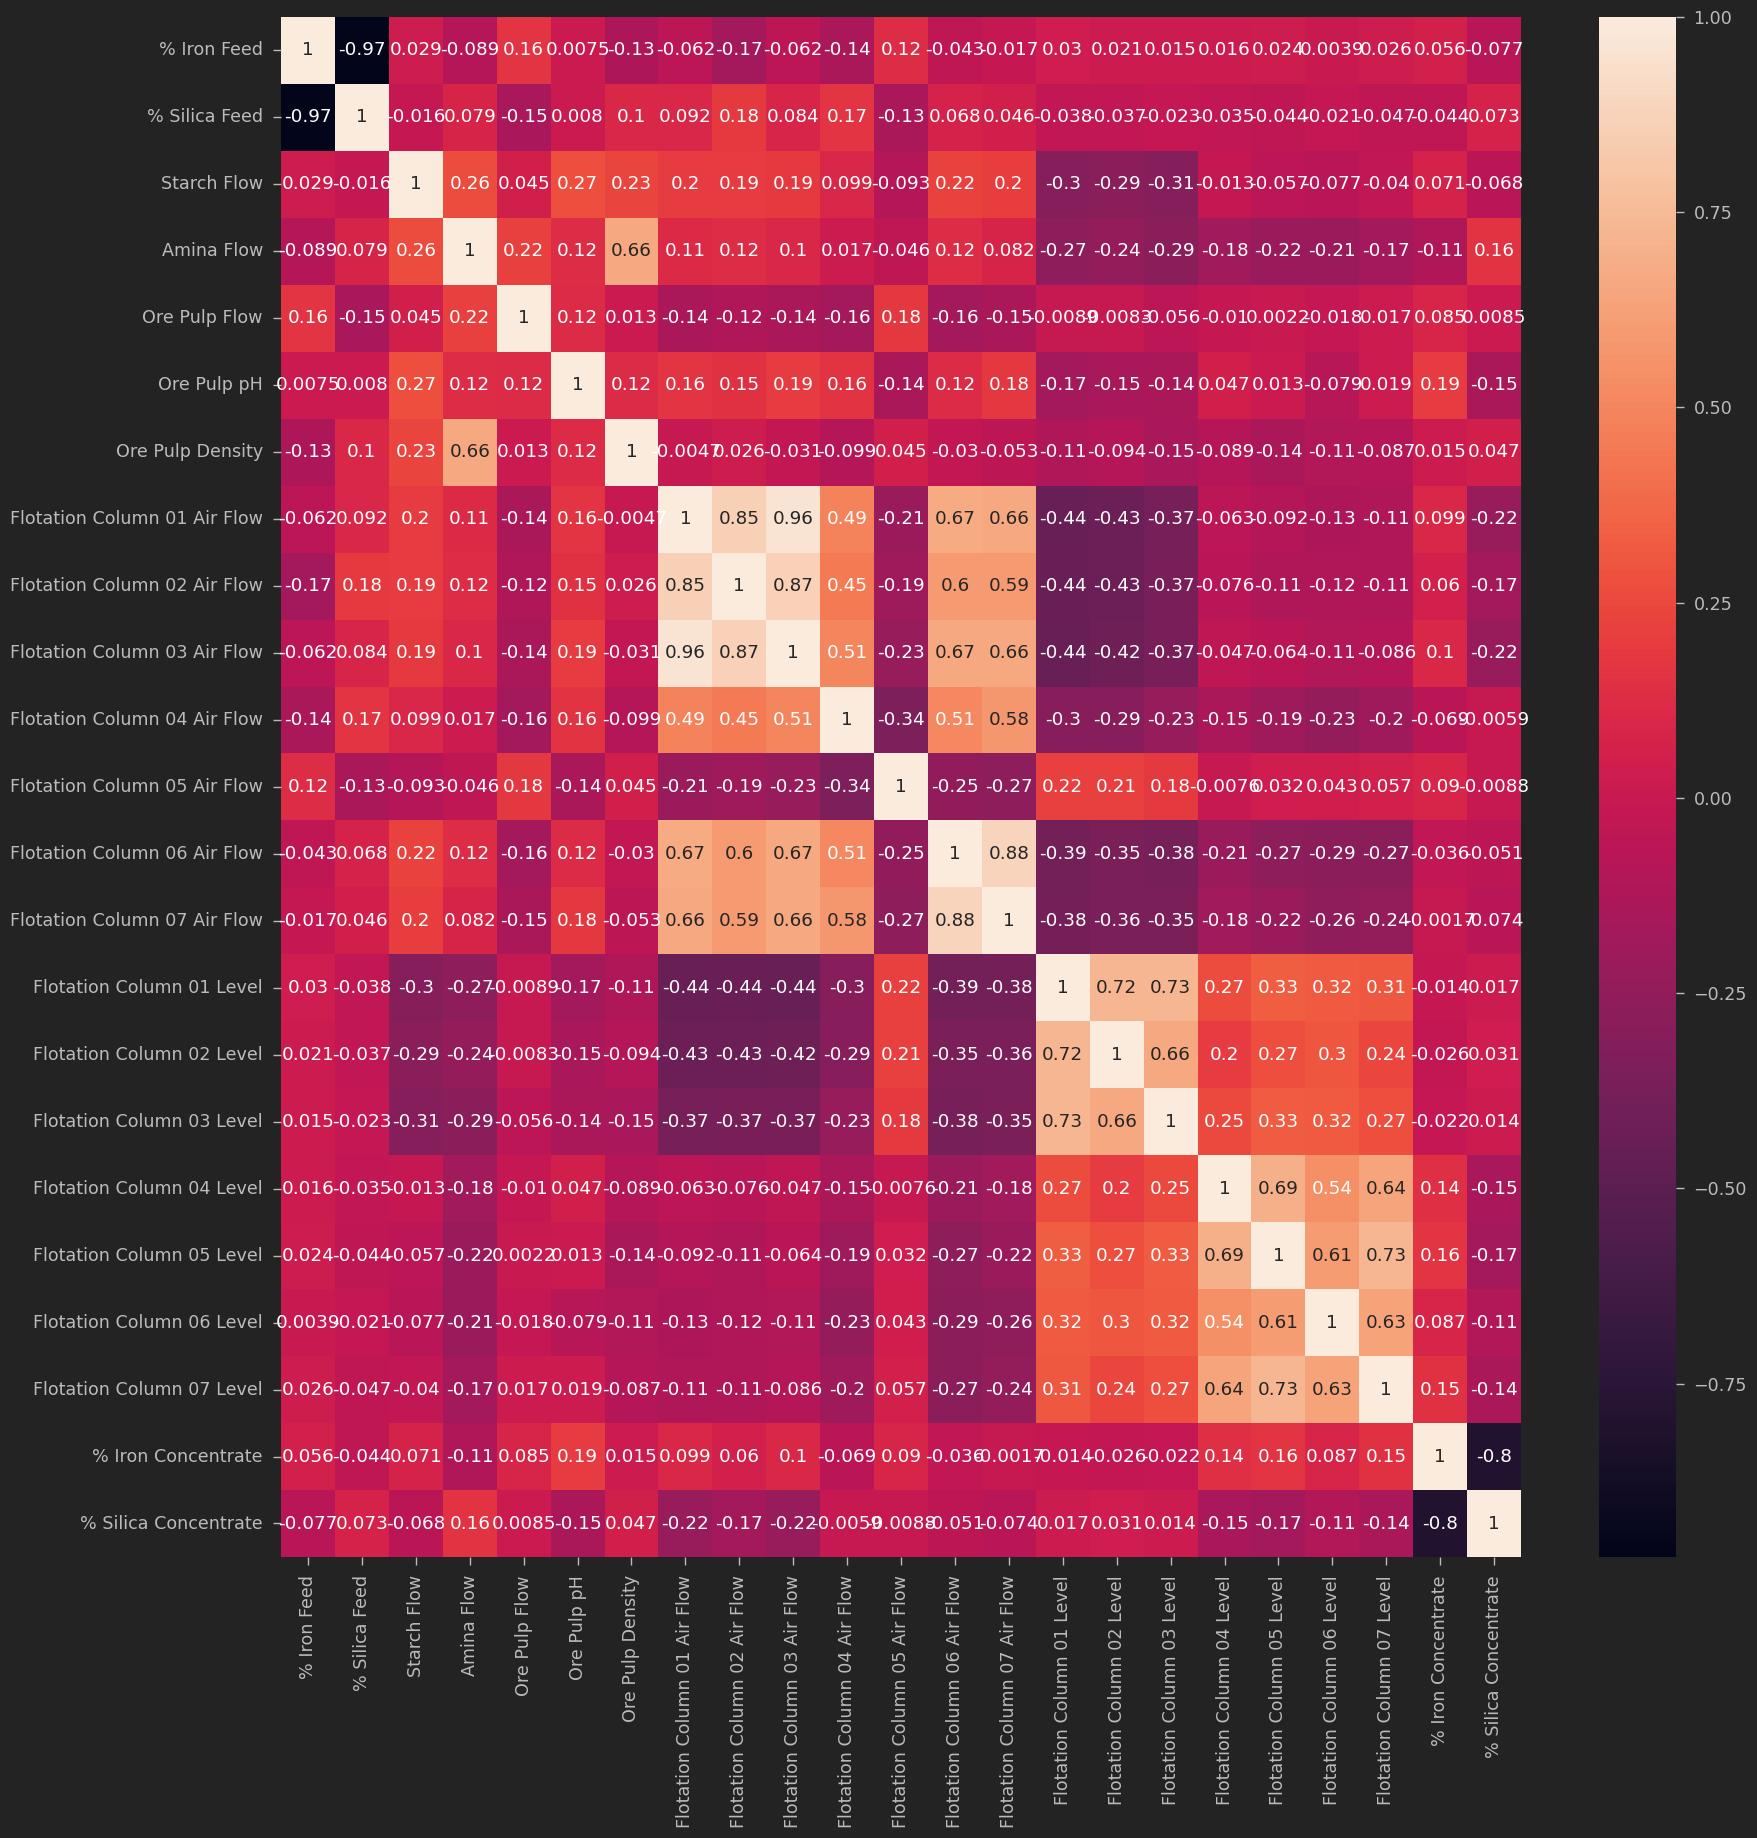

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df_mining.corr(), annot=True)

<Axes: xlabel='% Silica Concentrate', ylabel='% Iron Concentrate'>

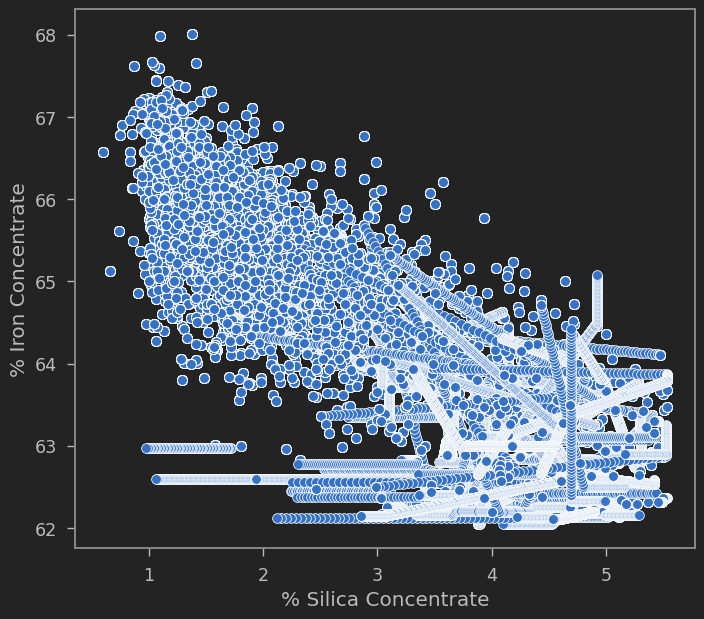

In [11]:
#correlation btween %Silica Concentrate and Iron Concentrate
sns.scatterplot(x=df_mining['% Silica Concentrate'], y=df_mining['% Iron Concentrate'], data=df_mining)

<Axes: xlabel='% Iron Feed', ylabel='% Silica Feed'>

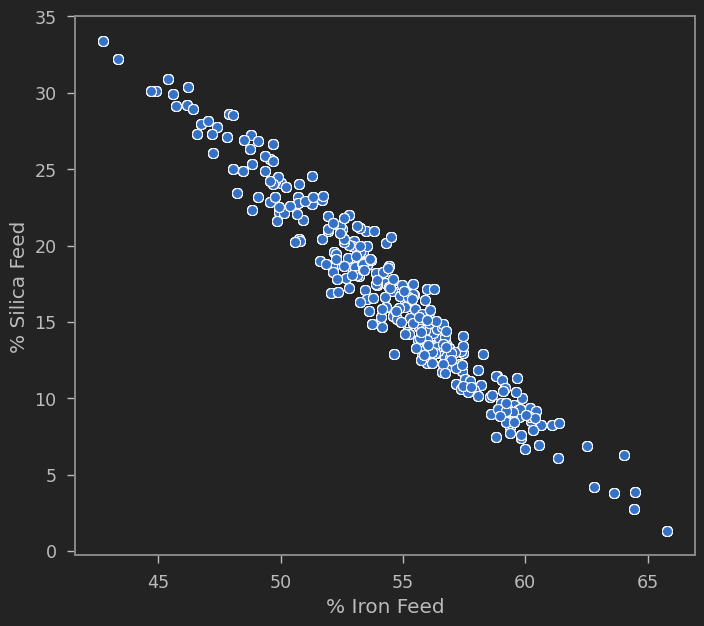

In [12]:
#correlation btween %Iron Feed and %Silica  Feed
sns.scatterplot(y=df_mining['% Silica Feed'], x=df_mining['% Iron Feed'], data=df_mining)

# **Preparation des donnees avant l'entrainement Du modele**

Separation des donnees en variable dependant et independant

In [13]:
df_iron = df_mining.drop(['% Silica Concentrate'], axis=1)
df_iron

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
0,55.20,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.447667,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06
1,55.20,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,250.235667,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06
2,55.20,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,250.634667,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06
3,55.20,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.928000,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06
4,55.20,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,250.195667,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245695,49.75,23.20,2961.490000,452.658667,381.784667,9.615990,1.654507,300.351000,295.703667,298.312667,...,345.647667,321.464444,404.055667,523.933667,880.286833,331.448333,500.245000,424.037667,400.798000,64.27
245696,49.75,23.20,2851.376667,470.843333,384.250000,9.617760,1.654413,299.978667,304.478333,301.176667,...,347.677333,335.351222,417.104667,548.184333,883.347000,388.821000,482.577333,338.373000,371.803333,64.27
245697,49.75,23.20,2729.876667,463.040667,383.073667,9.619523,1.654070,302.416667,299.060000,299.929000,...,349.501667,291.529000,386.853000,546.765000,870.141667,435.600333,488.983667,420.578667,366.426333,64.27
245698,49.75,23.20,2698.756667,460.303667,384.490667,9.620873,1.653653,302.603000,299.953333,299.483667,...,345.632667,285.945000,395.502667,443.776333,872.247333,416.832667,495.943333,437.163000,417.842667,64.27


In [14]:
df_iron_target = df_mining['% Silica Concentrate']
df_iron_target

,% Silica Concentrate
0,1.11
1,1.11
2,1.11
3,1.11
4,1.11
...,...
245695,1.71
245696,1.71
245697,1.71
245698,1.71


In [15]:
print(df_iron.shape)
print(df_iron_target.shape)

(245700, 22)
(245700,)


In [16]:
#convertir les variable en un tableau
df_iron= np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [17]:
# redimensionement de df_iron_target
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(245700, 1)

In [18]:
#mise à l'échelle des données avant d'alimenter le modèle
scaler_x = StandardScaler()
X = scaler_x.fit_transform(df_iron)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(df_iron_target)

In [19]:
# donnees 80% d'entrainement et 20% de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(196560, 22)
(49140, 22)
(196560, 1)
(49140, 1)


# **Entrainement et évaluation du modèle de régression linéaire**

In [21]:
LinearRegression_Model = LinearRegression()
LinearRegression_Model.fit(X_train, y_train)

LinearRegression()

In [22]:
accuracy_LinearRegression = LinearRegression_Model.score(X_test, y_test)
print(accuracy_LinearRegression)

0.6781654946564349


# **Entrainement et évaluation du modèle d'Arbre de decision**

In [23]:
DecisionTreeRegressor_Model = DecisionTreeRegressor()
DecisionTreeRegressor_Model.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
accuracy_score_DecisionTreeRegressor = DecisionTreeRegressor_Model.score(X_test, y_test)
print(accuracy_score_DecisionTreeRegressor)


0.9806575196161628


# **Entrainement et évaluation du modèle de forêt aléatoire**

In [25]:
RandomForestRegressor_Model = RandomForestRegressor(n_estimators=100, max_depth=20)
RandomForestRegressor_Model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=20)

In [26]:
accuracy_score_RandomForestRegressor = RandomForestRegressor_Model.score(X_test, y_test)
print(accuracy_score_RandomForestRegressor)

0.9928826410744219


# **Entrainement et évaluation du modèle de Reseaux de Neurones**

In [33]:
optimizer = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07, amsgrad=False)
ANN_model = keras.Sequential()
ANN_model.add(Dense(250, input_dim=22, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation='linear'))
ANN_model.compile(loss='mse', optimizer='adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 250)               5750      
                                                                 
 dense_8 (Dense)             (None, 500)               125500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_9 (Dense)             (None, 1000)              501000    
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_7 (Dropout)         (None, 1000)             

In [34]:
history = ANN_model.fit(X_train, y_train, epochs=15, validation_split = 0.2)

Epoch 1/15
4914/4914 [==============================] - 378s 77ms/step - loss: 0.2087 - val_loss: 0.1701
Epoch 2/15
4914/4914 [==============================] - 360s 73ms/step - loss: 0.1435 - val_loss: 0.1377
Epoch 3/15
4914/4914 [==============================] - 350s 71ms/step - loss: 0.1205 - val_loss: 0.1058
Epoch 4/15
4914/4914 [==============================] - 350s 71ms/step - loss: 0.1042 - val_loss: 0.0934
Epoch 5/15
4914/4914 [==============================] - 354s 72ms/step - loss: 0.0958 - val_loss: 0.0753
Epoch 6/15
4914/4914 [==============================] - 350s 71ms/step - loss: 0.0880 - val_loss: 0.0759
Epoch 7/15
4914/4914 [==============================] - 349s 71ms/step - loss: 0.0841 - val_loss: 0.0780
Epoch 8/15
4914/4914 [==============================] - 349s 71ms/step - loss: 0.0802 - val_loss: 0.0649
Epoch 9/15
4914/4914 [==============================] - 349s 71ms/step - loss: 0.0769 - val_loss: 0.0666
Epoch 10/15
4914/4914 [==============================] 

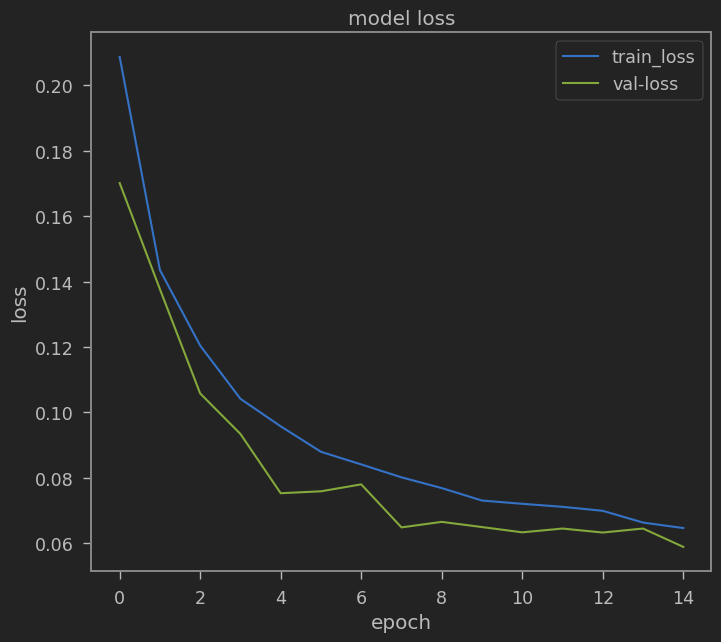

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val-loss'], loc='upper right')
plt.show()

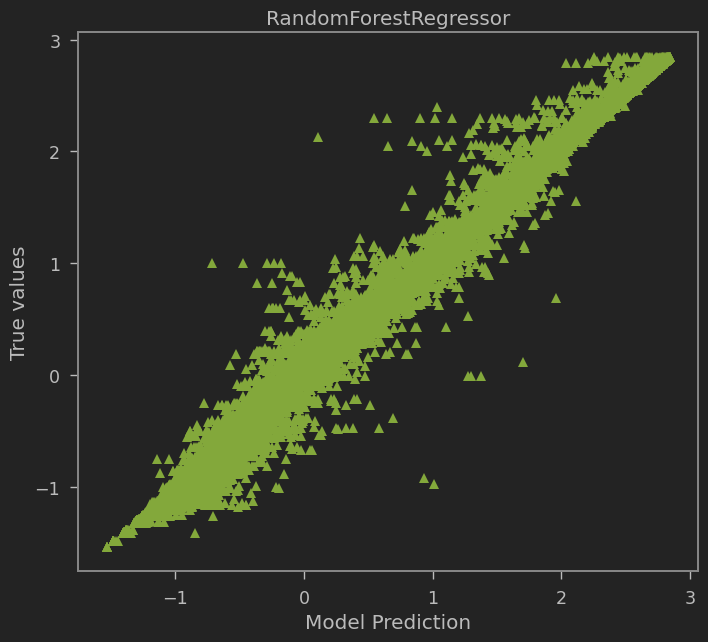

In [39]:
y_predict =RandomForestRegressor_Model.predict(X_test)
plt.plot(y_predict,y_test,"^" , color='g')
plt.xlabel("Model Prediction")
plt.ylabel("True values")
plt.title("RandomForestRegressor")
plt.show()

Text(0, 0.5, 'True Values')

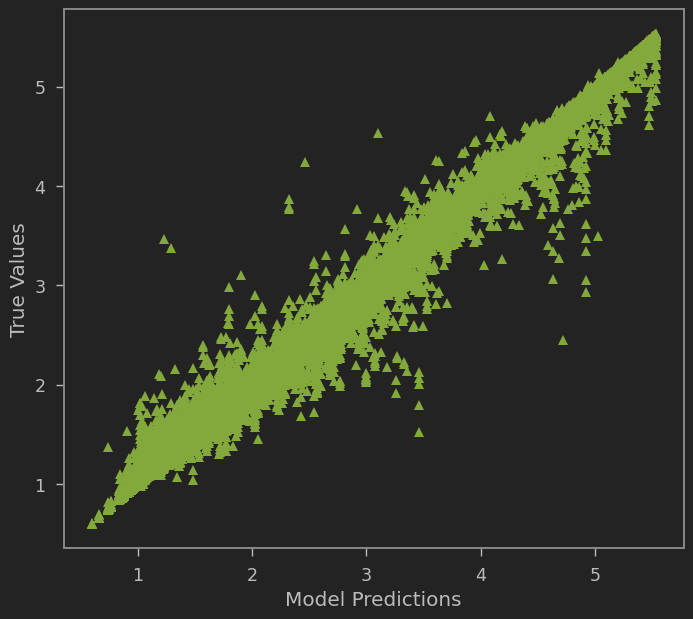

In [43]:
y_predict_orig = scaler_y.inverse_transform(y_predict.reshape(-1,1))
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, "^", color = 'g')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.095 
MSE = 0.009035123468772647 
MAE = 0.041156666940113364 
R2 = 0.9928826410744219 
Adjusted R2 = 0.9928794531375291
